# Connect to DB

In [1]:
import sqlite3 as sql

In [2]:
con = sql.connect('database.sqlite')
con

In [3]:
curobj = con.cursor()

In [4]:
curobj.execute('Select name from sqlite_master where type="table" ')

print(curobj.fetchall())

[('Extra_Runs',), ('Batsman_Scored',), ('Batting_Style',), ('Country',), ('Season',), ('City',), ('Outcome',), ('Win_By',), ('Wicket_Taken',), ('Venue',), ('Extra_Type',), ('Out_Type',), ('Toss_Decision',), ('Umpire',), ('Team',), ('Ball_by_Ball',), ('sysdiagrams',), ('sqlite_sequence',), ('Match',), ('Rolee',), ('Player_Match',), ('Player',), ('Bowling_Style',)]


In [5]:
def read_sql_query(query,con):
    try:
        df = pd.read_sql_query(query,con)
    except Exception as err:
        print(err)
        return
    return df

In [6]:
q = """
    SELECT * FROM Player;
"""
player = read_sql_query(q,con)
player.head()

,Player_Id,Player_Name,DOB,Batting_Id,Bowling_Id,Country_Id
0,1,SC Ganguly,1972-07-08 00:00:00,1,1.0,1
1,2,BB McCullum,1981-09-27 00:00:00,2,1.0,4
2,3,RT Ponting,1974-12-19 00:00:00,2,1.0,5
3,4,DJ Hussey,1977-07-15 00:00:00,2,2.0,5
4,5,Mohammad Hafeez,1980-10-17 00:00:00,2,2.0,6


In [7]:
q = """
    SELECT * FROM season;
"""
season = read_sql_query(q,con)
season.head(10)

,Season_Id,Man_of_the_Series,Orange_Cap,Purple_Cap,Season_Year
0,1,32,100,102,2008
1,2,53,18,61,2009
2,3,133,133,131,2010
3,4,162,162,194,2011
4,5,315,162,190,2012
5,6,32,19,71,2013
6,7,305,46,364,2014
7,8,334,187,71,2015
8,9,8,8,299,2016


In [8]:
data = list(season['Man_of_the_Series'].values)+ list(season['Orange_Cap'].values) + list(season['Purple_Cap'].values)
data

[32,
 53,
 133,
 162,
 315,
 32,
 305,
 334,
 8,
 100,
 18,
 133,
 162,
 162,
 19,
 46,
 187,
 8,
 102,
 61,
 131,
 194,
 190,
 71,
 364,
 71,
 299]

In [9]:
ds = set(data)

In [10]:
len(ds)

21

In [11]:
player.shape[0] - len(ds)

448

In [12]:
q = """
    SELECT * FROM Season;
"""
df = read_sql_query(q,con)
df

,Season_Id,Man_of_the_Series,Orange_Cap,Purple_Cap,Season_Year
0,1,32,100,102,2008
1,2,53,18,61,2009
2,3,133,133,131,2010
3,4,162,162,194,2011
4,5,315,162,190,2012
5,6,32,19,71,2013
6,7,305,46,364,2014
7,8,334,187,71,2015
8,9,8,8,299,2016


In [13]:
df.columns

Index(['Season_Id', 'Man_of_the_Series', 'Orange_Cap', 'Purple_Cap',
       'Season_Year'],
      dtype='object')

In [14]:
df['Season_Year'].max()

2016

# Joins

**JOINS are used to combine rows from multiple tables based on the columns which have similar information**

## Left Join

In [15]:
q = """
    Select a.Player_Id,a.Player_Name,b.Season_Id,b.Man_of_the_Series 
    from Player a 
    left join season b
    on a.player_id=b.Man_of_the_Series;
"""

read_sql_query(q,con).head(10)

,Player_Id,Player_Name,Season_Id,Man_of_the_Series
0,1,SC Ganguly,NaN,NaN
1,2,BB McCullum,NaN,NaN
2,3,RT Ponting,NaN,NaN
3,4,DJ Hussey,NaN,NaN
4,5,Mohammad Hafeez,NaN,NaN
5,6,R Dravid,NaN,NaN
6,7,W Jaffer,NaN,NaN
7,8,V Kohli,9.0,8.0
8,9,JH Kallis,NaN,NaN
9,10,CL White,NaN,NaN


## Class Task:
* Perform left join Player and Season tables to find the orange cap winners

In [16]:
q = """
    SELECT a.Player_Id,a.Player_Name,b.Season_Id,b.Orange_Cap 
      FROM Player a 
      left join Season b
      on a.player_id = b.Orange_Cap;      
"""
orange_caps = read_sql_query(q,con)
orange_caps.head(10)

,Player_Id,Player_Name,Season_Id,Orange_Cap
0,1,SC Ganguly,NaN,NaN
1,2,BB McCullum,NaN,NaN
2,3,RT Ponting,NaN,NaN
3,4,DJ Hussey,NaN,NaN
4,5,Mohammad Hafeez,NaN,NaN
5,6,R Dravid,NaN,NaN
6,7,W Jaffer,NaN,NaN
7,8,V Kohli,9.0,8.0
8,9,JH Kallis,NaN,NaN
9,10,CL White,NaN,NaN


## Right Join

In [17]:
q = """    
    SELECT a.Season_Id,a.Orange_Cap,b.Player_Id,b.Player_Name 
      FROM Season a 
      right join Player b
      on a.Orange_Cap = b.player_id;      
"""
orange_caps = read_sql_query(q,con)
orange_caps

Execution failed on sql '    
    SELECT a.Season_Id,a.Orange_Cap,b.Player_Id,b.Player_Name 
      FROM Season a 
      right join Player b
      on a.Orange_Cap = b.player_id;      
': RIGHT and FULL OUTER JOINs are not currently supported


## Inner Join
**"Inner Join" is used to output only those rows which have the matching value in both tables**  

In [18]:
q = """
    Select a.Player_Id,a.Player_Name,b.Season_Id,b.Man_of_the_Series 
    from Player a 
    inner join season b
    on a.player_id=b.Man_of_the_Series;
"""

read_sql_query(q,con).head(10)

,Player_Id,Player_Name,Season_Id,Man_of_the_Series
0,32,SR Watson,1,32
1,53,AC Gilchrist,2,53
2,133,SR Tendulkar,3,133
3,162,CH Gayle,4,162
4,315,SP Narine,5,315
5,32,SR Watson,6,32
6,305,GJ Maxwell,7,305
7,334,AD Russell,8,334
8,8,V Kohli,9,8


In [19]:
q = """
    SELECT a.Player_Id,a.Player_Name,b.Season_Id,b.Orange_Cap 
      FROM Player a 
      inner join Season b
      on a.player_id = b.Orange_Cap;      
"""
orange_caps = read_sql_query(q,con)
orange_caps.head(10)

,Player_Id,Player_Name,Season_Id,Orange_Cap
0,100,SE Marsh,1,100
1,18,ML Hayden,2,18
2,133,SR Tendulkar,3,133
3,162,CH Gayle,4,162
4,162,CH Gayle,5,162
5,19,MEK Hussey,6,19
6,46,RV Uthappa,7,46
7,187,DA Warner,8,187
8,8,V Kohli,9,8


## Self join

A table join with itself is called as self join

## Joining Multiple Tables

In [20]:
q = """
    select a.Player_Id,a.Player_Name as Man_Of_the_Series,b.Season_id,b.Season_year,c.Country_Name from Player a
    inner join season b
    on a.Player_Id = b.Man_of_the_Series
    inner join Country c
    on a.country_id = c.country_id
"""
# q  = """ select * from country; """
# left join Season b
read_sql_query(q,con)

,Player_Id,Man_Of_the_Series,Season_Id,Season_Year,Country_Name
0,32,SR Watson,1,2008,Australia
1,53,AC Gilchrist,2,2009,Australia
2,133,SR Tendulkar,3,2010,India
3,162,CH Gayle,4,2011,West Indies
4,315,SP Narine,5,2012,West Indies
5,32,SR Watson,6,2013,Australia
6,305,GJ Maxwell,7,2014,Australia
7,334,AD Russell,8,2015,West Indies
8,8,V Kohli,9,2016,India


## Class Task:
Using inner join, multiple join, self join get a dataframe with the following columns<br>

Seaon_Id, Man_of_the_Series,<br> Man_of_the_Series_Country_Name,<br> Orange_Cap_Winner,<br> Orange_Cap_Winner_Country_Name,<br> Purple_Cap_Winner,<br> Purple_Cap_Winner_Country_Name

In [21]:
# a.Player_Id,a.Player_Name as Orange_Cap,b.Season_id,b.Season_year,c.Country_Name

In [22]:
q = """
    select a.Season_id, b.Player_Name as Man_of_the_Series,c.Country_name as Man_of_the_Series_Country_Name,
                        e.Player_name as Orange_Cap_Winner,f.country_name as Orange_Cap_Winner_Country_Name,
                        g.Player_Name as Purple_Cap_Winner ,h.country_name as Purple_Cap_Winner_Country_Name
    from season a
    inner join player b
    on a.Man_of_the_Series = b.Player_id
    inner join Country c
    on b.country_id = c.country_id
    inner join player e
    on a.Orange_Cap = e.Player_id
    inner join country f
    on e.country_id = f.country_id
    inner join player g
    on a.Purple_Cap = g.Player_id
    inner join country h
    on g.country_id = h.country_id
    
"""
# q  = """ select * from season; """
# left join Season b
read_sql_query(q,con)

,Season_Id,Man_of_the_Series,Man_of_the_Series_Country_Name,Orange_Cap_Winner,Orange_Cap_Winner_Country_Name,Purple_Cap_Winner,Purple_Cap_Winner_Country_Name
0,1,SR Watson,Australia,SE Marsh,Australia,Sohail Tanvir,Pakistan
1,2,AC Gilchrist,Australia,ML Hayden,Australia,RP Singh,India
2,3,SR Tendulkar,India,SR Tendulkar,India,PP Ojha,India
3,4,CH Gayle,West Indies,CH Gayle,West Indies,SL Malinga,Sri Lanka
4,5,SP Narine,West Indies,CH Gayle,West Indies,M Morkel,South Africa
5,6,SR Watson,Australia,MEK Hussey,Australia,DJ Bravo,West Indies
6,7,GJ Maxwell,Australia,RV Uthappa,India,MM Sharma,India
7,8,AD Russell,West Indies,DA Warner,Australia,DJ Bravo,West Indies
8,9,V Kohli,India,V Kohli,India,B Kumar,India


## Like and Wild Cards
* Like and wild cards are used to identify patterns in strings

In [23]:
q  = """ 
    select * from bowling_style
    where Bowling_Style like 'left%'; 
    
    """

read_sql_query(q,con)

,Bowling_Id,Bowling_Style
0,6,Left-arm fast-medium
1,9,Left-arm medium-fast
2,13,Left-arm medium
3,14,Left-arm fast


In [24]:
q  = """ 
    select * from bowling_style
    where Bowling_Style like 'legbreak%'; 
    
    """

read_sql_query(q,con)

,Bowling_Id,Bowling_Style
0,4,Legbreak googly
1,10,Legbreak


## Class Task: 
* Output all the left hand bowling styles

In [25]:
q  = """ 
    select *,'Left_Hand' as Bownling_Hand from bowling_style
    where Bowling_Style like '%left%'; 
    
    """

read_sql_query(q,con)

,Bowling_Id,Bowling_Style,Bownling_Hand
0,6,Left-arm fast-medium,Left_Hand
1,7,Slow left-arm orthodox,Left_Hand
2,8,Slow left-arm chinaman,Left_Hand
3,9,Left-arm medium-fast,Left_Hand
4,13,Left-arm medium,Left_Hand
5,14,Left-arm fast,Left_Hand


## Null

In [26]:
q  = """ 
    select  a.player_id,a.Player_name,b.season_id
      from player a 
      left join season b
      on a.player_id = b.Man_of_the_series
      where Season_id is not null
    """
# q = """ Select * from player"""
read_sql_query(q,con).head(10)

,Player_Id,Player_Name,Season_Id
0,32,SR Watson,1
1,53,AC Gilchrist,2
2,133,SR Tendulkar,3
3,162,CH Gayle,4
4,315,SP Narine,5
5,32,SR Watson,6
6,305,GJ Maxwell,7
7,334,AD Russell,8
8,8,V Kohli,9


## Class Task
* Output all the players who have never won in any of the three categories (man of the series,Orange cap,Purple cap)

In [27]:
q = """ 
    select a.player_id,a.player_name,
        b.Man_of_the_Series as ms,
        c.Orange_cap as oc ,d.purple_cap as pc
    from player a 
    left join season b
    on a.player_id = b.Man_of_the_Series
    left join season c
    on a.player_id = c.Orange_cap
    left join season d
    on a.player_id = d.purple_cap
    where( ms is null and oc is null and pc is null)
"""

df = read_sql_query(q,con)
df.head(5)

,Player_Id,Player_Name,ms,oc,pc
0,1,SC Ganguly,None,None,None
1,2,BB McCullum,None,None,None
2,3,RT Ponting,None,None,None
3,4,DJ Hussey,None,None,None
4,5,Mohammad Hafeez,None,None,None


In [28]:
# q = """ 
#     select a.player_id,a.player_name,
#         b.Man_of_the_Series as ms,
#         c.Orange_cap as oc ,d.purple_cap as pc
#     from player a 
#     left join season b
#     on a.player_id = b.Man_of_the_Series
#     left join season c
#     on a.player_id = c.Orange_cap
#     left join season d
#     on a.player_id = d.purple_cap

# """

# df = read_sql_query(q,con)
# df.head(40)

* Query to select all the players, who have won any of the season atleast once

In [29]:
q = """ 
    select a.player_id,a.player_name,
           b.Man_of_the_Series as ms,b.season_id as msid,
           c.Orange_cap as oc ,c.season_id as osid,
           d.purple_cap as pc ,d.season_id as dsid
    from player a 
    left join season b
    on a.player_id = b.Man_of_the_Series
    left join season c
    on a.player_id = c.Orange_cap
    left join season d
    on a.player_id = d.purple_cap
    where ms is not null  or  oc is not null or pc is not null
"""

read_sql_query(q,con)

,Player_Id,Player_Name,ms,msid,oc,osid,pc,dsid
0,8,V Kohli,8.0,9.0,8.0,9.0,NaN,NaN
1,18,ML Hayden,NaN,NaN,18.0,2.0,NaN,NaN
2,19,MEK Hussey,NaN,NaN,19.0,6.0,NaN,NaN
3,32,SR Watson,32.0,1.0,NaN,NaN,NaN,NaN
4,32,SR Watson,32.0,6.0,NaN,NaN,NaN,NaN
5,46,RV Uthappa,NaN,NaN,46.0,7.0,NaN,NaN
6,53,AC Gilchrist,53.0,2.0,NaN,NaN,NaN,NaN
7,61,RP Singh,NaN,NaN,NaN,NaN,61.0,2.0
8,71,DJ Bravo,NaN,NaN,NaN,NaN,71.0,6.0
9,71,DJ Bravo,NaN,NaN,NaN,NaN,71.0,8.0


## Case When

In [30]:
q = """
    SELECT *,
      CASE 
          WHEN Bowling_Style LIKE '%left%' THEN 'Left_Handed'
          WHEN Bowling_Style LIKE '%right%' THEN 'Right_Handed'
          ELSE 'Legbreak'
      END as Bowling_Hand 
      
      FROM bowling_style      
      ;

"""
read_sql_query(q,con)

,Bowling_Id,Bowling_Style,Bowling_Hand
0,1,Right-arm medium,Right_Handed
1,2,Right-arm offbreak,Right_Handed
2,3,Right-arm fast-medium,Right_Handed
3,4,Legbreak googly,Legbreak
4,5,Right-arm medium-fast,Right_Handed
5,6,Left-arm fast-medium,Left_Handed
6,7,Slow left-arm orthodox,Left_Handed
7,8,Slow left-arm chinaman,Left_Handed
8,9,Left-arm medium-fast,Left_Handed
9,10,Legbreak,Legbreak


**Note: There is no limit to number of "when - then" statements in CASE WHEN**

## Class Task
* Find the list of players whose batting hand is different from their bowling hand

In [31]:
q = """
    SELECT * FROM 
    (SELECT a.Player_Name,
             CASE 
                 WHEN b.Bowling_Style LIKE '%left%' THEN 'Left_Hand'
                 WHEN b.Bowling_Style LIKE '%right%' THEN 'Right_Hand'
                 ELSE 'LegBreak'
             END AS 'Bowling_Hand',
             CASE 
                 WHEN c.Batting_hand LIKE '%left%' THEN 'Left_Hand'
                 WHEN c.Batting_hand LIKE '%right%' THEN 'Right_Hand'
                 ELSE 'LegBreak'
             END AS 'Batting_Hand' 
     FROM Player a
     inner join
     Bowling_Style b
             on a.Bowling_Id = b.Bowling_Id
     inner join Batting_Style c
                 on a.Batting_Id = c.Batting_Id)
     WHERE Bowling_Hand <> Batting_Hand
      AND Bowling_Hand <> 'LegBreak'

"""
# q = """ select * from Player;"""
read_sql_query(q,con)

,Player_Name,Bowling_Hand,Batting_Hand
0,SC Ganguly,Right_Hand,Left_Hand
1,Z Khan,Left_Hand,Right_Hand
2,ML Hayden,Right_Hand,Left_Hand
3,MEK Hussey,Right_Hand,Left_Hand
4,SK Raina,Right_Hand,Left_Hand
...,...,...,...
63,TP Sudhindra,Right_Hand,Left_Hand
64,P Suyal,Left_Hand,Right_Hand
65,TA Boult,Left_Hand,Right_Hand
66,GS Sandhu,Right_Hand,Left_Hand


In [32]:
# q = """ Select * from player where Player_Name like '%Ten%'; """
# read_sql_query(q,con)

# Aggregations

## Count

In [33]:
# Counting the Number of IPL players
q = """
    select count(*) as Number_of_Players
    from Player;
"""
read_sql_query(q,con)

,Number_of_Players
0,469


## Group by

In [34]:
#Counting the Number of IPL Players from each Country
q = """
    SELECT b.Country_name,count(*) as Number_of_Players from 
    player a 
        inner join
    country b
        on a.country_id = b.country_id
    group by a.country_id
    order by 2 desc;
"""

# q= """ select * from season ;"""
read_sql_query(q,con)

,Country_Name,Number_of_Players
0,India,262
1,Australia,72
2,South Africa,39
3,New Zealand,22
4,Sri Lanka,20
5,West Indies,19
6,England,14
7,Pakistan,13
8,Bangladesh,5
9,Zimbabwea,2


## Sum

## Class Task
* Find number of runs scored by each player (use Batsman_Scored, Ball_by_Ball and Player tables)

In [59]:
# Number of Runs scored by each IPL Player
q = """
    SELECT c.Player_Name,sum(b.Runs_Scored) as "Total Runs"
      FROM Ball_by_Ball a 
      inner join Batsman_Scored b
      on a.match_id = b.match_id
       and a.Over_id = b.Over_id
       and a.Ball_id = b.Ball_id
       and a.Innings_No = b.Innings_No
       inner join player c
       on a.striker = c.Player_id
      group by Player_Name
      order by 2 desc;
"""

# q= """ select * from  Batsman_Scored ;""" # Ball_by_Ball where match_id='335987'
read_sql_query(q,con)

,Player_Name,Total Runs
0,SK Raina,4106
1,V Kohli,4105
2,RG Sharma,3874
3,G Gambhir,3634
4,CH Gayle,3447
...,...,...
429,L Ablish,0
430,IC Pandey,0
431,C Nanda,0
432,Abdur Razzak,0


## MIN

## Max

## Avg

## Having
* Having is used to filter the data after all the aggregations are done

In [36]:
# Find the matches which had conceided more than 35 extra runs

q = """
    select Match_id,sum(Extra_Runs) as ext_runs
    from extra_runs a
    group by a.Match_Id
    having ext_runs > 35
"""
read_sql_query(q,con)

,Match_Id,ext_runs
0,335987,36
1,335991,38
2,419137,38
3,501265,36
4,829816,36


# Where and Having

# Order of Execution

**FROM   
WHERE  
GROUP BY  
HAVING  
SELECT  
ORDER BY  
LIMIT**

## Class Task
* Output the list of players who made a century

In [37]:
q = """ 
    SELECT a.match_id,c.Player_Name,sum(b.Runs_scored) Runs
      FROM ball_by_ball a 
      inner join batsman_scored b
      on a.match_id=b.match_id
      and a.over_id = b.Over_id
      and a.Ball_id = b.Ball_id
      and a.Innings_No = b.Innings_No   
      inner join player c
      on a.Striker = c.Player_id
       group by a.match_id,a.Striker       
        having Runs >= 100
        order by 3 desc;  
"""

# q = """ Select * from  player ;""" #batsman_scored
df = read_sql_query(q,con)
df.head(10)

,Match_Id,Player_Name,Runs
0,598032,CH Gayle,175
1,335987,BB McCullum,158
2,829800,AB de Villiers,133
3,980992,AB de Villiers,129
4,548377,CH Gayle,128
5,419142,M Vijay,127
6,734052,V Sehwag,122
7,501211,PC Valthaty,120
8,501248,V Sehwag,119
9,335995,A Symonds,117


## Subquery
* **Subquery or Nested qyery is a query with in another SQL query in the where or from clause**

In [38]:
# Find the minimum and maximum extra runs conceded in a match
q = """
    select max(total_extra_runs),min(total_extra_runs) from 
    (select match_id,sum(extra_runs) as total_extra_runs
    from extra_runs 
    group by match_id);
"""
read_sql_query(q,con)

,max(total_extra_runs),min(total_extra_runs)
0,38,4


## Class Task
* Find the max and min of runs scored by batsmen in an innings

In [39]:
q= """

    select  player_name,max(innings_score) Max_innings_score,min(innings_score) as Min_innings_score
      from  (
    select a.match_id,c.Player_Name,sum(b.runs_scored) as innings_score
       from  ball_by_ball a 
 inner join  batsman_scored b
         on  a.match_id = b.match_id
        and  a.Over_id = b.Over_id
        and  a.Ball_id = b.Ball_id
 inner join  player c
         on  a.Striker = c.Player_id
   group by  a.match_id,a.Striker
              )
   group by  player_name
   order by  1
       ;
       """
read_sql_query(q,con).head(5)

,Player_Name,Max_innings_score,Min_innings_score
0,A Ashish Reddy,75,3
1,A Chandila,9,0
2,A Chopra,42,2
3,A Flintoff,59,22
4,A Kumble,19,0


In [40]:
#Find max_innings_score , min_innings_score
q= """

    select  max(innings_score) max_score ,min(innings_score) min_score
      from (
     select a.match_id,c.Player_Name,sum(b.runs_scored) as innings_score
       from  ball_by_ball a 
 inner join  batsman_scored b
         on  a.match_id = b.match_id
        and  a.Over_id = b.Over_id
        and  a.Ball_id = b.Ball_id
 inner join  player c
         on  a.Striker = c.Player_id
   group by  a.match_id,a.Striker
   )
    ;
"""

# q = """ select * from batsman_scored;"""
read_sql_query(q,con)

,max_score,min_score
0,231,0


In [41]:
#Find the batsman who scored more than 200, in any particular innings
q= """    
     select a.match_id,c.Player_Name,sum(b.runs_scored) as innings_score
       from  ball_by_ball a 
 inner join  batsman_scored b
         on  a.match_id = b.match_id
        and  a.Over_id = b.Over_id
        and  a.Ball_id = b.Ball_id
 inner join  player c
         on  a.Striker = c.Player_id
   group by  a.match_id,a.Striker
     having  innings_score > 200
   order by  3 desc   
    ;
"""
# q = """ select * from batsman_scored;"""
read_sql_query(q,con)

,Match_Id,Player_Name,innings_score
0,598032,CH Gayle,231
1,335995,A Symonds,225
2,829800,AB de Villiers,224
3,501211,PC Valthaty,213
4,419142,M Vijay,210
5,548377,CH Gayle,210
6,336024,SE Marsh,208
7,734052,V Sehwag,206
8,392241,MK Pandey,204
9,419142,NV Ojha,204


## Correlated Query
* **Correlated query is a type of subquery where the inner query runs parallelly with the each row in the outer query**

In [42]:
#Sample query for dob in ascending order
q = """
    select * from Player
order by   dob
"""
read_sql_query(q,con).iloc[0:10,:]

,Player_Id,Player_Name,DOB,Batting_Id,Bowling_Id,Country_Id
0,44,ST Jayasuriya,1969-06-30 00:00:00,1,7.0,7
1,38,SK Warne,1969-09-13 00:00:00,2,4.0,5
2,34,DS Lehmann,1970-02-05 00:00:00,1,7.0,5
3,118,GD McGrath,1970-02-09 00:00:00,2,3.0,5
4,16,SB Joshi,1970-06-06 00:00:00,1,7.0,1
5,124,A Kumble,1970-10-17 00:00:00,2,4.0,1
6,316,GB Hogg,1971-02-06 00:00:00,1,8.0,5
7,370,PV Tambe,1971-10-08 00:00:00,2,10.0,1
8,225,DR Martyn,1971-10-21 00:00:00,2,1.0,5
9,18,ML Hayden,1971-10-29 00:00:00,1,1.0,5


In [43]:
q = """
    select * from Player a 
    where 4 = (select count(*) from player b 
            where b.dob <= a.dob)
"""
read_sql_query(q,con)

,Player_Id,Player_Name,DOB,Batting_Id,Bowling_Id,Country_Id
0,118,GD McGrath,1970-02-09 00:00:00,2,3,5


# Dates

In [44]:
q = """
    SELECT * FROM Player;
"""

read_sql_query(q,con).head()

,Player_Id,Player_Name,DOB,Batting_Id,Bowling_Id,Country_Id
0,1,SC Ganguly,1972-07-08 00:00:00,1,1.0,1
1,2,BB McCullum,1981-09-27 00:00:00,2,1.0,4
2,3,RT Ponting,1974-12-19 00:00:00,2,1.0,5
3,4,DJ Hussey,1977-07-15 00:00:00,2,2.0,5
4,5,Mohammad Hafeez,1980-10-17 00:00:00,2,2.0,6


In [45]:
q = """
    select Player_Name, strftime('%Y',DOB) as Birth_Year
      From Player
"""
read_sql_query(q,con).head()

,Player_Name,Birth_Year
0,SC Ganguly,1972
1,BB McCullum,1981
2,RT Ponting,1974
3,DJ Hussey,1977
4,Mohammad Hafeez,1980


In [46]:
# Count of players born in each year
q = """
    SELECT strftime('%Y',DOB) as Birth_Year,count(*) as Number_of_Players
      FROM player a
  GROUP BY Birth_Year
  order by 1
"""

df = read_sql_query(q,con)
df.head()

,Birth_Year,Number_of_Players
0,1969,2
1,1970,4
2,1971,5
3,1972,3
4,1973,4


In [47]:
plt.figure(figsize=(16,8))
df.plot(kind='bar',x='Birth_Year',y='Number_of_Players')
plt.show()

<Figure size 1600x800 with 0 Axes>

<Figure size 640x480 with 1 Axes>

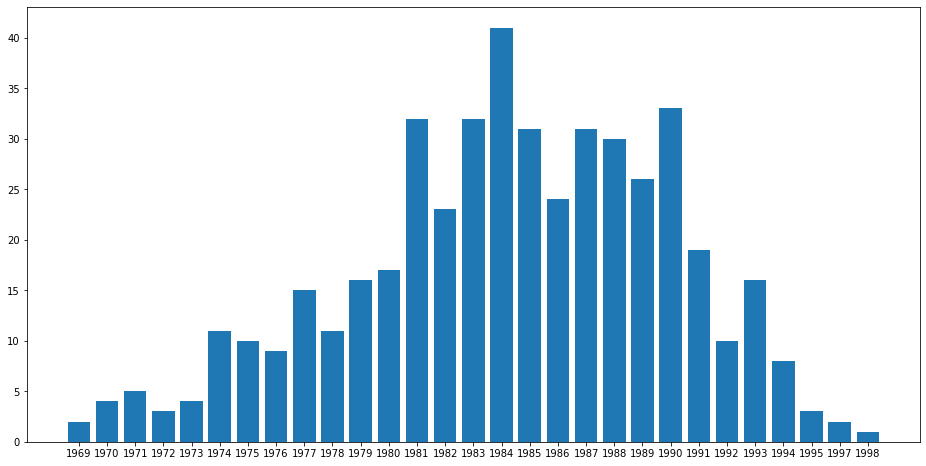

In [48]:
plt.figure(figsize=(16,8))
plt.bar(df['Birth_Year'],df['Number_of_Players'])
plt.show()

## Class Task
* Count the number of players born in each month and plot it

In [49]:
q = """
    SELECT strftime('%m',DOB) as Month_Born,count(*) as Players
    FROM Player
GROUP BY Month_Born
"""

df = read_sql_query(q,con)
df.head()

,Month_Born,Players
0,01,29
1,02,38
2,03,30
3,04,37
4,05,32


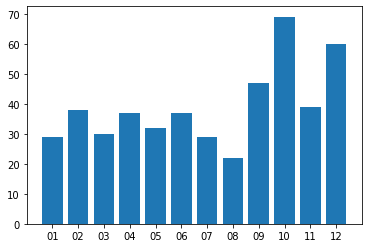

In [50]:
plt.bar(df['Month_Born'],df['Players'])
plt.show()

# Window functions

## row_number

In [51]:
q = """ 
   Select * 
   from (
    SELECT Player_Name,DOB, row_number() over(order by DOB) as row_number
      FROM Player 
      )
      where row_number=13
"""
read_sql_query(q,con)

,Player_Name,DOB,row_number
0,SC Ganguly,1972-07-08 00:00:00,13


## rank and dense_rank

In [52]:
q = """
    select Player_Name,DOB, 
          row_number() over(partition by Country_Id order by DOB) as row_number,
          rank() over(partition by Country_Id order by DOB) as rank,
          dense_rank() over(partition by Country_Id order by DOB) as dense_rank
    from player 
"""
# q = """ Select * from player """
read_sql_query(q,con)

,Player_Name,DOB,row_number,rank,dense_rank
0,SB Joshi,1970-06-06 00:00:00,1,1,1
1,A Kumble,1970-10-17 00:00:00,2,2,2
2,PV Tambe,1971-10-08 00:00:00,3,3,3
3,SC Ganguly,1972-07-08 00:00:00,4,4,4
4,SB Bangar,1972-10-11 00:00:00,5,5,5
...,...,...,...,...,...
464,Mashrafe Mortaza,1983-10-05 00:00:00,2,2,2
465,Mohammad Ashraful,1984-07-07 00:00:00,3,3,3
466,Shakib Al Hasan,1987-03-24 00:00:00,4,4,4
467,Mustafizur Rahman,1995-09-06 00:00:00,5,5,5


## Class Task
* Row number based on date of birth of players by country_Name partitions

In [53]:
q = """
    SELECT country_id,player_name,row_number() over(partition by Country_Id order by DOB) dob_rank
    FROM player
    
"""
read_sql_query(q,con)

,Country_Id,Player_Name,dob_rank
0,1,SB Joshi,1
1,1,A Kumble,2
2,1,PV Tambe,3
3,1,SC Ganguly,4
4,1,SB Bangar,5
...,...,...,...
464,11,Mashrafe Mortaza,2
465,11,Mohammad Ashraful,3
466,11,Shakib Al Hasan,4
467,11,Mustafizur Rahman,5


## Class Task
* Rank the runs scored by batsmen in decreasing order

In [54]:
q = """
    select Player_Name,total_runs,rank() over(order by total_runs desc) as batsman_ranking
      From (
    SELECT c.Player_Name,sum(b.Runs_Scored) as total_runs
           
      FROM ball_by_ball a
inner join batsman_scored b
        on a.match_id = b.match_id
       and a.Over_id = b.Over_id
       and a.Ball_Id = b.Ball_Id
inner join player c
        on a.Striker = c.Player_id
  Group by c.Player_Name
  )
"""
# q = """ select * from batsman_scored """ # batsman_scored
read_sql_query(q,con)

,Player_Name,total_runs,batsman_ranking
0,V Kohli,8158,1
1,SK Raina,7588,2
2,RG Sharma,7263,3
3,G Gambhir,6793,4
4,RV Uthappa,6303,5
...,...,...,...
429,M Ashwin,0,429
430,ND Doshi,0,429
431,Sunny Gupta,0,429
432,V Pratap Singh,0,429


In [168]:
con.close()

# References:
* . https://www.sqlite.org/lang_datefunc.html

# End

In [114]:
curobj.execute('Select name from sqlite_master where type="table" ')
print(curobj.fetchall())

[('Extra_Runs',), ('Batsman_Scored',), ('Batting_Style',), ('Country',), ('Season',), ('City',), ('Outcome',), ('Win_By',), ('Wicket_Taken',), ('Venue',), ('Extra_Type',), ('Out_Type',), ('Toss_Decision',), ('Umpire',), ('Team',), ('Ball_by_Ball',), ('sysdiagrams',), ('sqlite_sequence',), ('Match',), ('Rolee',), ('Player_Match',), ('Player',), ('Bowling_Style',)]


In [64]:
(5-7.25)**2 + (7-7.25)**2 + (7-7.25)**2 + (10-7.25)**2

12.75

In [66]:
import numpy as np

In [67]:
np.sqrt(3.1875)

1.7853571071357126

In [65]:
12.75/4

3.1875

In [68]:
(72-65.5)/2.5

2.6

In [70]:
onem = 1000000

In [71]:
2.5*onem

2500000.0

In [ ]:
z